In [1]:
# Problem 1
import pandas as pd
file_path= 'C:/Users/ramya/Downloads/SP500_ticker.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()



,ticker,company_name,sector
0,MMM,3M Co.,Industrials
1,ACE,ACE Limited,Financials
2,ABT,Abbott Laboratories,Health Care
3,ANF,Abercrombie & Fitch Company A,Consumer Discretionary
4,ADBE,Adobe Systems Inc,Information Technology


In [2]:
file_path= 'C:/Users/ramya/Downloads/SP500_close_price_no_missing.csv'
df=pd.read_csv('C:/Users/ramya/Downloads/SP500_close_price_no_missing.csv')
df.head()

,date,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
0,2011-01-03,86.79,62.24,47.82,58.03,31.29,8.47,12.54,31.04,57.54,...,30.67,108.99,23.56,11.71,29.42,22.16,16.75,49.09,54.97,25.17
1,2011-01-04,86.67,62.20,48.27,56.22,31.51,8.77,12.60,31.20,56.49,...,30.48,112.39,23.66,11.40,29.54,22.05,16.59,48.34,54.24,24.76
2,2011-01-05,86.67,61.99,48.27,55.35,32.22,8.91,12.77,31.50,56.38,...,30.38,113.84,23.52,11.46,29.64,22.17,16.91,48.57,54.28,24.90
3,2011-01-06,86.14,61.72,48.17,53.53,32.27,8.69,12.99,32.09,56.07,...,29.94,114.67,23.50,11.46,30.14,22.16,17.06,48.91,52.60,24.83
4,2011-01-07,86.23,61.26,48.37,53.57,32.04,8.83,12.99,32.16,55.85,...,29.83,118.73,23.71,11.30,29.97,22.12,16.90,49.52,52.59,24.57


In [3]:
# a) 1.


import numpy as np
file_path_ticker = 'C:/Users/ramya/Downloads/SP500_ticker.csv'
file_path_close_price = 'C:/Users/ramya/Downloads/SP500_close_price_no_missing.csv'
# Read the CSV files into pandas DataFrames
ticker_df = pd.read_csv(file_path_ticker, encoding='ISO-8859-1')
close_price_df = pd.read_csv(file_path_close_price)

# Display the first few rows of the close price dataset to understand its structure
print(close_price_df.head())

# Derive log returns from the raw stock price dataset
log_returns_df = close_price_df.copy()  # Create a copy to store log returns

# Calculate log returns for each stock
log_returns_df.iloc[:, 1:] = close_price_df.iloc[:, 1:].apply(lambda x: np.log(x) - np.log(x.shift(1)))

# Display the first few rows of the log returns dataset
print(log_returns_df.head())

# Now 'log_returns_df' contains log returns for each stock
# You can proceed with further analysis using these log returns


         date    MMM    ACE    ABT    ANF   ADBE   AMD    AES    AET    AFL  \
0  2011-01-03  86.79  62.24  47.82  58.03  31.29  8.47  12.54  31.04  57.54   
1  2011-01-04  86.67  62.20  48.27  56.22  31.51  8.77  12.60  31.20  56.49   
2  2011-01-05  86.67  61.99  48.27  55.35  32.22  8.91  12.77  31.50  56.38   
3  2011-01-06  86.14  61.72  48.17  53.53  32.27  8.69  12.99  32.09  56.07   
4  2011-01-07  86.23  61.26  48.37  53.57  32.04  8.83  12.99  32.16  55.85   

   ...    WYN    WYNN    XEL    XRX   XLNX     XL   YHOO    YUM    ZMH   ZION  
0  ...  30.67  108.99  23.56  11.71  29.42  22.16  16.75  49.09  54.97  25.17  
1  ...  30.48  112.39  23.66  11.40  29.54  22.05  16.59  48.34  54.24  24.76  
2  ...  30.38  113.84  23.52  11.46  29.64  22.17  16.91  48.57  54.28  24.90  
3  ...  29.94  114.67  23.50  11.46  30.14  22.16  17.06  48.91  52.60  24.83  
4  ...  29.83  118.73  23.71  11.30  29.97  22.12  16.90  49.52  52.59  24.57  

[5 rows x 472 columns]
         date       M

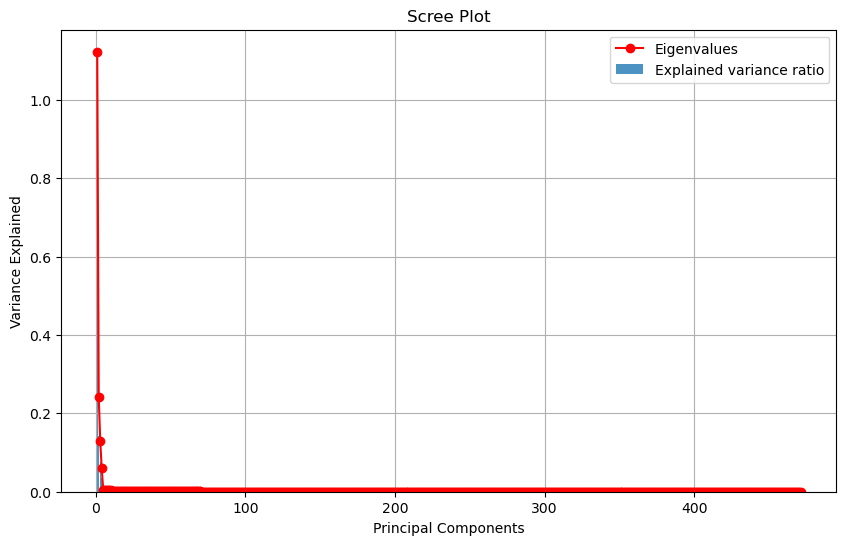

In [4]:
# a) 2.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Drop any rows with missing values if necessary
log_returns_df.dropna(inplace=True)

# Extract log returns for PCA
log_returns_values = log_returns_df.iloc[:, 1:].values  # Exclude date column for PCA

# Perform PCA
pca = PCA()
pca.fit(log_returns_values)

# Calculate the explained variance ratio and eigenvalues
explained_var_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, alpha=0.8, align='center',
        label='Explained variance ratio')
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='red', label='Eigenvalues')

plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()


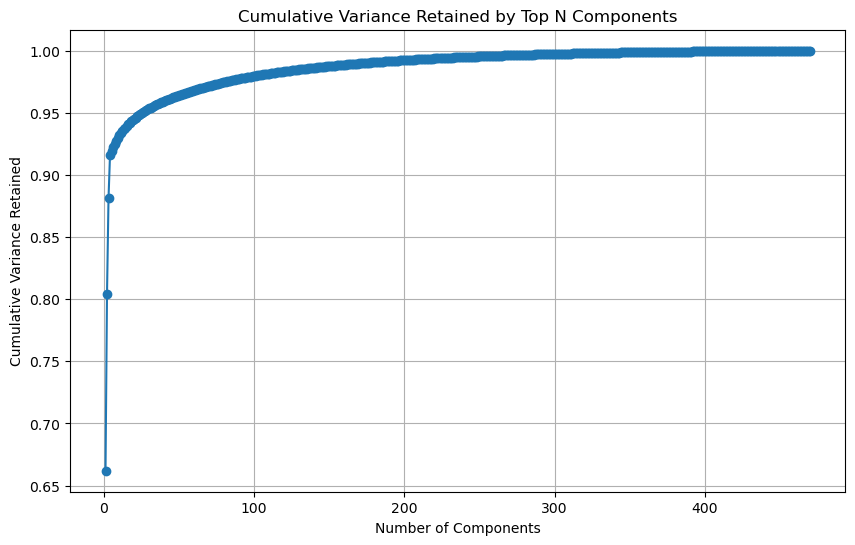

In [6]:
# a) 3.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Drop any rows with missing values if necessary
log_returns_df.dropna(inplace=True)

# Extract log returns for PCA
log_returns_values = log_returns_df.iloc[:, 1:].values  # Exclude date column for PCA

# Perform PCA
pca = PCA()
pca.fit(log_returns_values)

# Calculate the explained variance ratio and eigenvalues
explained_var_ratio = pca.explained_variance_ratio_

# Calculate cumulative variance retained
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Plot cumulative variance retained for top N components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='-')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Retained')
plt.title('Cumulative Variance Retained by Top N Components')
plt.grid(True)
plt.show()


In [7]:
# a) 4.

# Find the number of components needed to capture at least 80% of variance
n_components_80_percent = np.argmax(cumulative_var_ratio >= 0.8) + 1

print(f"Number of components to capture 80% of variance: {n_components_80_percent}")


Number of components to capture 80% of variance: 2


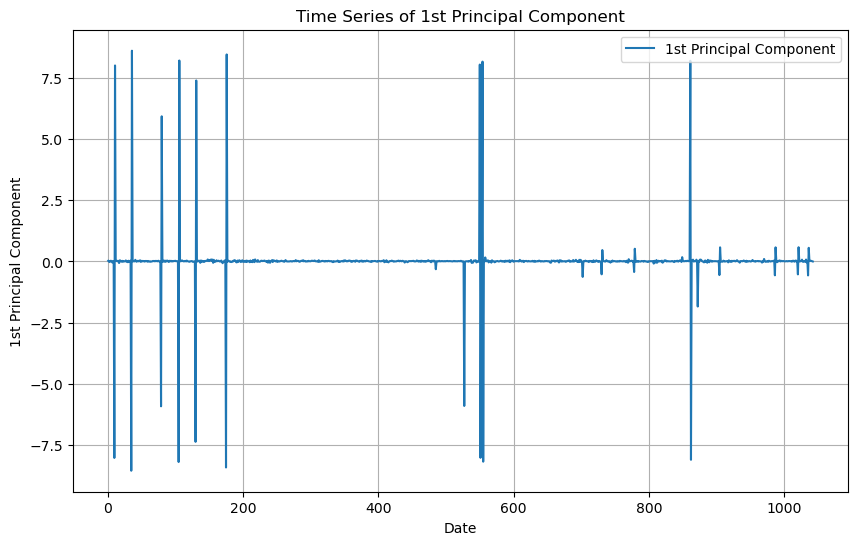

In [8]:
# b) 1.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have already loaded and preprocessed the log returns data into 'log_returns_df'

# Extract log returns values for PCA
log_returns_values = log_returns_df.iloc[:, 1:].values  # Exclude date column for PCA

# Perform PCA
pca = PCA()
pca.fit(log_returns_values)

# Get the 1st principal component
first_principal_component = pca.components_[0]

# Transform log returns data using PCA to get the principal components
transformed_data = pca.transform(log_returns_values)

# Extract the 1st principal component time series
component_1_ts = transformed_data[:, 0]  # Time series of the 1st principal component

# Plot the time series of the 1st principal component
plt.figure(figsize=(10, 6))
plt.plot(log_returns_df.index, component_1_ts, label='1st Principal Component')
plt.xlabel('Date')
plt.ylabel('1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# b) 2.

# Extract log returns values for PCA
log_returns_values = log_returns_df.iloc[:, 1:].values  # Exclude date column for PCA

# Perform PCA
pca = PCA()
pca.fit(log_returns_values)

# Extract the weights for the 1st and 2nd principal components
weights_1st_pc = pca.components_[0]  # Weights of the 1st principal component
weights_2nd_pc = pca.components_[1]  # Weights of the 2nd principal component

# Create DataFrames to display the weights
weights_df_1st_2nd_pc = pd.DataFrame({'Stocks': log_returns_df.columns[1:], 
                                      '1st_PC_Weights': weights_1st_pc,
                                      '2nd_PC_Weights': weights_2nd_pc})

print(weights_df_1st_2nd_pc.head())  # Display the first few rows of weights for 1st and 2nd PCs


  Stocks  1st_PC_Weights  2nd_PC_Weights
0    ACE       -0.000424       -0.000912
1    ABT        0.000071       -0.000076
2    ANF       -0.000285        0.000186
3   ADBE       -0.000573       -0.000187
4    AMD        0.000048        0.000564


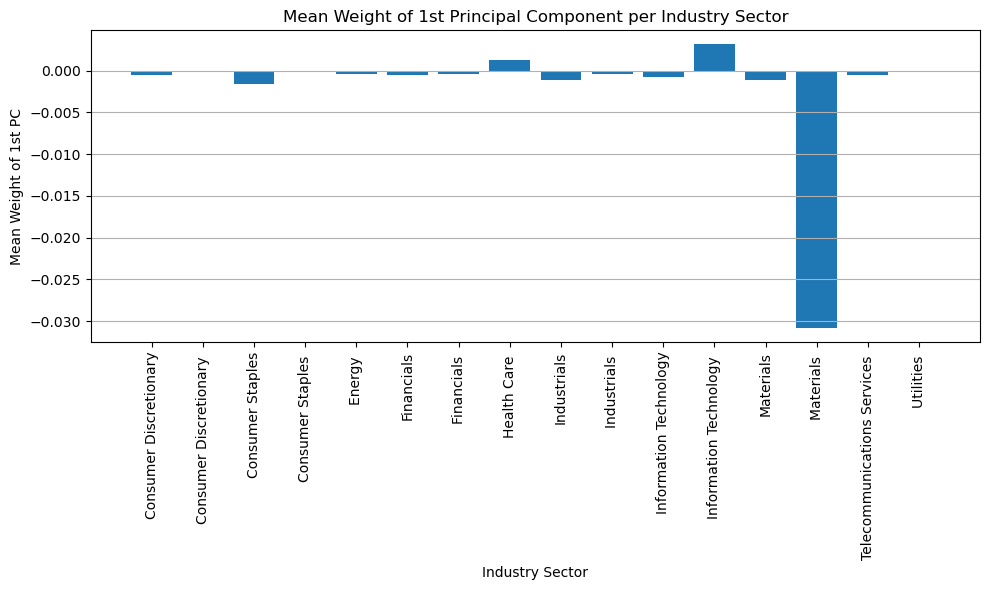

In [10]:
# b) 3.

# Assuming 'log_returns_df' contains the log returns data
# Extract log returns values for PCA
log_returns_values = log_returns_df.iloc[:, 1:].values  # Exclude date column for PCA

# Perform PCA
pca = PCA()
pca.fit(log_returns_values)

# Extract the weights for the 1st principal component
weights_1st_pc = pca.components_[0]  # Weights of the 1st principal component

# Combine weights with sector information
weights_sector_df = pd.DataFrame({'Stocks': log_returns_df.columns[1:], 'Weights': weights_1st_pc})
weights_sector_df = pd.merge(weights_sector_df, ticker_df[['ticker', 'sector']], left_on='Stocks', right_on='ticker')

# Calculate mean weight per sector
mean_weights_per_sector = weights_sector_df.groupby('sector')['Weights'].mean().reset_index()

# Plot bar plot of mean weight per sector
plt.figure(figsize=(10, 6))
plt.bar(mean_weights_per_sector['sector'], mean_weights_per_sector['Weights'])
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight of 1st PC')
plt.title('Mean Weight of 1st Principal Component per Industry Sector')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



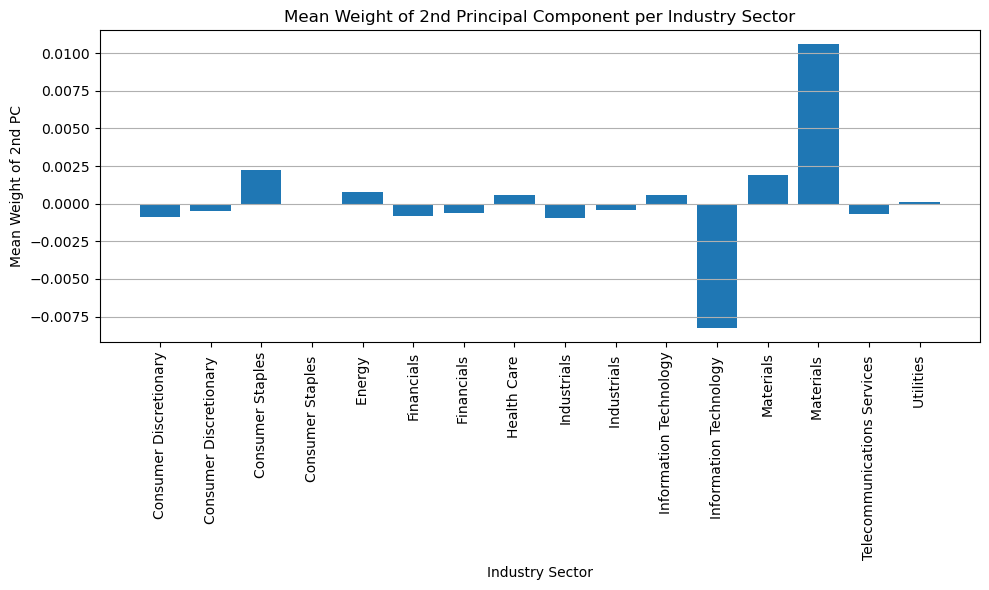

In [11]:
# b) 4. 

# Extract the weights for the 2nd principal component
weights_2nd_pc = pca.components_[1]  # Weights of the 2nd principal component

# Combine weights with sector information
weights_sector_df_2nd_pc = pd.DataFrame({'Stocks': log_returns_df.columns[1:], 'Weights': weights_2nd_pc})
weights_sector_df_2nd_pc = pd.merge(weights_sector_df_2nd_pc, ticker_df[['ticker', 'sector']], left_on='Stocks', right_on='ticker')

# Calculate mean weight per sector for the 2nd principal component
mean_weights_per_sector_2nd_pc = weights_sector_df_2nd_pc.groupby('sector')['Weights'].mean().reset_index()

# Plot bar plot of mean weight per sector for the 2nd principal component
plt.figure(figsize=(10, 6))
plt.bar(mean_weights_per_sector_2nd_pc['sector'], mean_weights_per_sector_2nd_pc['Weights'])
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight of 2nd PC')
plt.title('Mean Weight of 2nd Principal Component per Industry Sector')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [12]:
# PROBLEM 2

In [13]:
file_path= 'C:/Users/ramya/Downloads/BMI.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()


,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,fatpctg
0,22,160.8,62.4,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
1,22,170.6,80.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,23,153.9,69.3,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
3,23,157.1,70.4,35.5,92.1,77.1,93.9,56.1,36.1,22.7,30.5,27.2,18.2,9.4
4,23,196.5,88.6,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3,10.3


In [14]:
#a) WRAPPER METHOD

import statsmodels.api as sm

# Load the data
file_path = 'C:/Users/ramya/Downloads/BMI.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Separate features and target variable
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Function for backward stepwise regression
def backward_regression(X, y):
    cols = list(X.columns)
    pmax = 1
    while len(cols) > 0:
        p = []
        X_1 = X[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y, X_1).fit()
        p = pd.Series(model.pvalues.values[1:], index=cols)
        pmax = max(p)
        feature_with_pmax = p.idxmax()
        if pmax > 0.05:
            cols.remove(feature_with_pmax)
        else:
            break
    selected_features_BE = cols
    return selected_features_BE

# Function for forward stepwise regression
def forward_regression(X, y):
    feature_names = list(X.columns)
    selected_features = []
    while len(feature_names) > 0:
        remaining_features = list(set(feature_names) - set(selected_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < 0.05:
            selected_features.append(new_pval.idxmin())
        else:
            break
    return selected_features

# Perform backward stepwise regression
selected_backward = backward_regression(X, y)
print("Selected features from backward stepwise regression:")
print(selected_backward)

# Perform forward stepwise regression
selected_forward = forward_regression(X, y)
print("\nSelected features from forward stepwise regression:")
print(selected_forward)


Selected features from backward stepwise regression:
['Age', 'Neck', 'Abdomen', 'Hip', 'Thigh', 'Forearm', 'Wrist']

Selected features from forward stepwise regression:
['Abdomen', 'Weight', 'Wrist', 'Forearm']


In [15]:
#b) FILTER METHOD

# Calculate the correlation between input variables and output ('fatpctg')
correlation_with_output = df.drop('fatpctg', axis=1).corrwith(df['fatpctg'])

# Sort the correlation values in descending order to get the ranking
correlation_ranking = correlation_with_output.abs().sort_values(ascending=False)

# Display the ranking of features based on correlation with the output
print("Ranking of features based on correlation with 'fatpctg':")
print(correlation_ranking)


Ranking of features based on correlation with 'fatpctg':
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
dtype: float64


In [16]:
# c) EMBEDDED METHOD 
# 1. LASSO REGRESSION

from sklearn.linear_model import Lasso

# Separate features and target variable
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha)
lasso.fit(X, y)

# Extract and display feature coefficients
lasso_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
lasso_coefficients = lasso_coefficients.sort_values(by='Coefficient', ascending=False)
print("Lasso regression coefficients:")
print(lasso_coefficients)



Lasso regression coefficients:
    Feature  Coefficient
5   Abdomen     0.942140
11  Forearm     0.360804
7     Thigh     0.226045
10   Biceps     0.111915
0       Age     0.056168
9     Ankle     0.041072
8      Knee    -0.011096
4     Chest    -0.025641
2    Height    -0.049766
1    Weight    -0.060435
6       Hip    -0.232305
3      Neck    -0.492599
12    Wrist    -1.332258


In [17]:
#C) 2. RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor

# Separate features and target variable
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Fit Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf.fit(X, y)

# Extract and display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nRandom Forest feature importances:")
print(feature_importances)



Random Forest feature importances:
    Feature  Importance
5   Abdomen    0.731153
2    Height    0.029401
1    Weight    0.029395
12    Wrist    0.026041
8      Knee    0.023688
3      Neck    0.023267
6       Hip    0.022485
0       Age    0.022080
7     Thigh    0.020623
4     Chest    0.020444
9     Ankle    0.019897
10   Biceps    0.017453
11  Forearm    0.014072
